<a href="https://colab.research.google.com/github/YoussifAssem/Genetics/blob/main/E-Genetics/Genetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports library**

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

**Reading big (DataSet)**

In [3]:
bigData = pd.read_csv('drive/MyDrive/graduation/Predict Genetic Disorder/trial.csv')
bigData.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1,NaN,1,1,0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0,0,0,0,NaN,Multifactorial genetic inheritance disorders,Cancer


**Illustrates bigData Output**

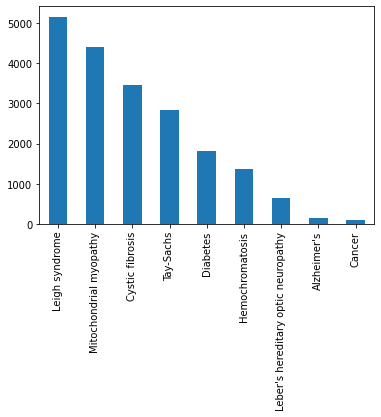

In [4]:
bigData['Disorder Subclass'].value_counts().plot.bar()

**Illustrates Genetic Disorder**

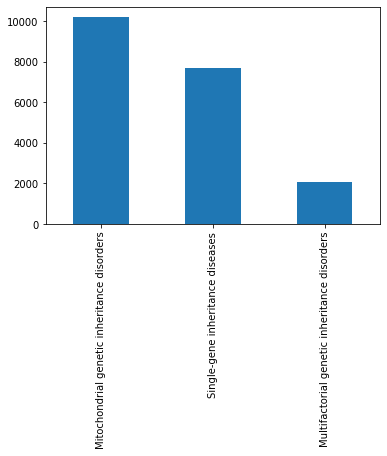

In [5]:
bigData['Genetic Disorder'].value_counts().plot.bar()

**Pre processing for bigData**

In [6]:
bigData = bigData.drop(columns=['Patient Age', 'Patient First Name', 'Family Name', "Father's name", "Mother's age", "Father's age", 'Institute Name', 'Location of Institute', 'Follow-up', 'Place of birth'], axis=1)
bigData.head()

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,Yes,No,Yes,No,4.760603,Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,NaN,NaN,Not applicable,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,Yes,Yes,No,No,4.910669,Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,NaN,No,None,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1,NaN,1,1,0,NaN,Cystic fibrosis
2,PID0x4a82,Yes,No,No,No,4.893297,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,NaN,No record,Not applicable,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,Yes,No,Yes,No,4.705280,Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,Male,Not available,No,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,Yes,No,NaN,Yes,4.720703,Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Male,Not available,Not applicable,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0,0,0,0,NaN,Multifactorial genetic inheritance disorders,Cancer


**Pre processing Data**

In [7]:
bigData["Patient Id"] = pd.get_dummies(bigData["Patient Id"])
bigData["Genes in mother's side"] = pd.get_dummies(bigData["Genes in mother's side"])
bigData["Inherited from father"] = pd.get_dummies(bigData["Inherited from father"])
bigData["Maternal gene"] = pd.get_dummies(bigData["Maternal gene"])
bigData["Paternal gene"] = pd.get_dummies(bigData["Paternal gene"])
bigData["Blood cell count (mcL)"] = pd.get_dummies(bigData["Blood cell count (mcL)"])
bigData["Status"] = pd.get_dummies(bigData["Status"])
bigData["Respiratory Rate (breaths/min)"] = pd.get_dummies(bigData["Respiratory Rate (breaths/min)"])
bigData["Heart Rate (rates/min"] = pd.get_dummies(bigData["Heart Rate (rates/min"])
bigData["Test 1"] = pd.get_dummies(bigData["Test 1"])
bigData["Test 2"] = pd.get_dummies(bigData["Test 2"])
bigData["Test 3"] = pd.get_dummies(bigData["Test 3"])
bigData["Test 4"] = pd.get_dummies(bigData["Test 4"])
bigData["Test 5"] = pd.get_dummies(bigData["Test 5"])
bigData["Gender"] = pd.get_dummies(bigData["Gender"])
bigData['Parental consent'] = pd.get_dummies(bigData['Parental consent'])
bigData["Birth asphyxia"] = pd.get_dummies(bigData["Birth asphyxia"])
bigData["Autopsy shows birth defect (if applicable)"] = pd.get_dummies(bigData["Autopsy shows birth defect (if applicable)"])
bigData["Folic acid details (peri-conceptional)"] = pd.get_dummies(bigData["Folic acid details (peri-conceptional)"])
bigData["H/O serious maternal illness"] = pd.get_dummies(bigData["H/O serious maternal illness"])
bigData["H/O radiation exposure (x-ray)"] = pd.get_dummies(bigData["H/O radiation exposure (x-ray)"])
bigData["H/O substance abuse"] = pd.get_dummies(bigData["H/O substance abuse"])
bigData["Assisted conception IVF/ART"] = pd.get_dummies(bigData["Assisted conception IVF/ART"])
bigData["History of anomalies in previous pregnancies"] = pd.get_dummies(bigData["History of anomalies in previous pregnancies"])
bigData["No. of previous abortion"] = pd.get_dummies(bigData["No. of previous abortion"])
bigData["Birth defects"] = pd.get_dummies(bigData["Birth defects"])
bigData["White Blood cell count (thousand per microliter)"] = pd.get_dummies(bigData["White Blood cell count (thousand per microliter)"])
bigData["Blood test result"] = pd.get_dummies(bigData["Blood test result"])
bigData["Symptom 1"] = pd.get_dummies(bigData["Symptom 1"])
bigData["Symptom 2"] = pd.get_dummies(bigData["Symptom 2"])
bigData["Symptom 3"] = pd.get_dummies(bigData["Symptom 3"])
bigData["Symptom 4"] = pd.get_dummies(bigData["Symptom 4"])
bigData["Symptom 5"] = pd.get_dummies(bigData["Symptom 5"])
bigData["Genetic Disorder"] = pd.get_dummies(bigData["Genetic Disorder"])


bigData['Genetic Disorder'] = bigData['Genetic Disorder'].replace(np.nan, 'Not Recognized')
bigData['Disorder Subclass'] = bigData['Disorder Subclass'].replace(np.nan, 'Not Reached')

bigData.head()

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Leber's hereditary optic neuropathy
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Cystic fibrosis
2,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Diabetes
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,Leigh syndrome
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,Cancer


****Make Data Ready for Creating Algorithms of(bigData)****

In [8]:
bigDataX_train, bigDataX_test, bigDatay_train, bigDatay_test = train_test_split(bigData.drop('Disorder Subclass', axis=1), bigData['Disorder Subclass'], test_size=0.3, random_state=1) 
print('Training data With X: \n ', bigDataX_train)
print('Training data With Y: \n ', bigDatay_train)
print('\n\n\n\n\nX_TEST : ', bigDataX_test)
print('\n\n\nY_TEST : ', bigDatay_test)


Training data With X: 
         Patient Id  Genes in mother's side  ...  Symptom 5  Genetic Disorder
20235           0                       1  ...          0                 1
7638            0                       1  ...          1                 0
15023           0                       0  ...          0                 0
15078           0                       1  ...          1                 1
5643            0                       0  ...          0                 0
...           ...                     ...  ...        ...               ...
17289           0                       0  ...          0                 0
5192            0                       0  ...          1                 1
12172           0                       0  ...          1                 1
235             0                       1  ...          1                 1
29733           0                       1  ...          0                 0

[22083 rows x 34 columns]
Training data With Y: 
  20235      

**Creating KNN Algorithm for (bigData)**

In [11]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(bigDataX_train, bigDatay_train)
model.predict(bigDataX_test)
print('KNN Accuracy: ', model.score(bigDataX_test, bigDatay_test))

KNN Accuracy:  0.5712625462229266


**Decision Tree**

Decision Tree Accuracy 0.58256735340729


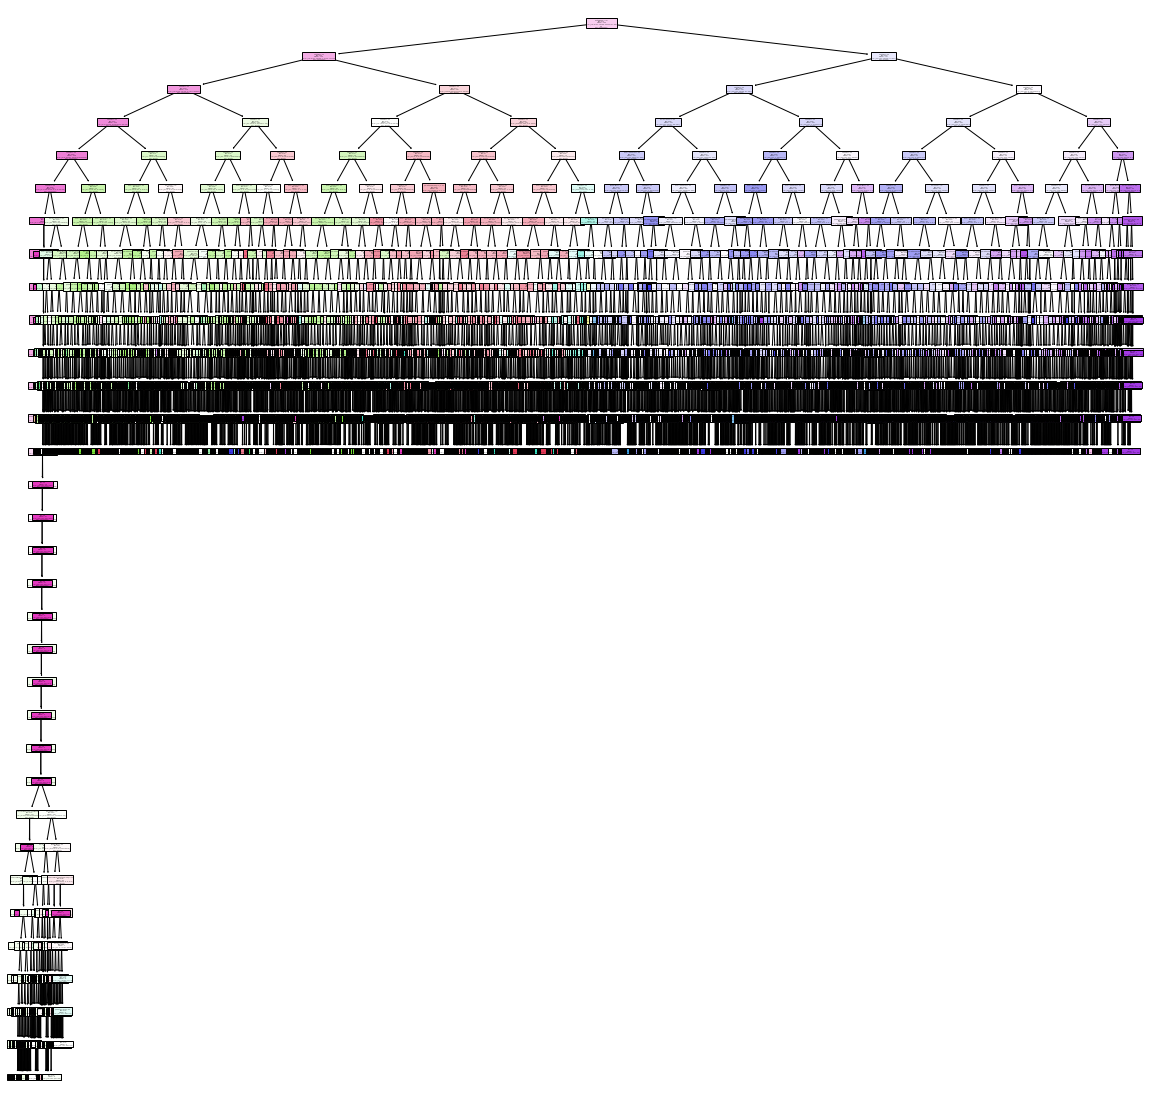

In [13]:
model = DecisionTreeClassifier()
model.fit(bigDataX_train, bigDatay_train)
fi = plt.figure(figsize=(20, 20))
plo = plot_tree(model, feature_names=list(bigData.columns), class_names=bigData['Disorder Subclass'],filled=True)
print('Decision Tree Accuracy', model.score(bigDataX_test, bigDatay_test))

**XGBOOST bigData**

In [12]:
model = XGBClassifier()
model.fit(bigDataX_train, bigDatay_train)
model.predict(bigDataX_test)
print('Accuracy of XGBOOST: ', model.score(bigDataX_test, bigDatay_test))

Accuracy of XGBOOST:  0.6296883254094031


**Reading DataSet (Alzahaimer's)**

In [ ]:
dS = pd.read_csv('drive/MyDrive/graduation/Alzheimers.csv')
dS.head()

,gene_name,refseq_id,miR,SNP,diseases,distance,experimentally_confirmed
0,LOC100379224,NR_033341,hsa-miR-573,rs3746319,Alzheimer's disease,0,NaN
1,LOC100379224,NR_033341,hsa-miR-185,rs4508518,Alzheimer's disease,0,NaN
2,LIPA,NM_001127605,hsa-miR-1324,rs13500,Alzheimer's disease,0,NaN
3,TRAF2,NM_021138,hsa-miR-199a-5p,rs7852970,Alzheimer's disease,0,NaN
4,TRAF2,NM_021138,hsa-miR-199b-5p,rs7852970,Alzheimer's disease,0,NaN


**Illustrate (Alzahaimer's) Output Data**

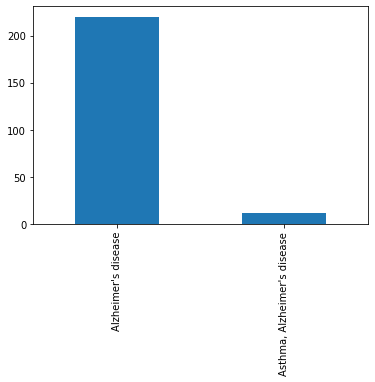

In [ ]:
dS['diseases'].value_counts().plot.bar()

**Pre processing Data for (Alzahaimer's)**

In [ ]:
dS['gene_name'] = pd.get_dummies(dS['gene_name'])
dS['refseq_id'] = pd.get_dummies(dS['refseq_id'])
dS['miR'] = pd.get_dummies(dS['miR'])
dS['SNP'] = pd.get_dummies(dS['SNP'])
dS['experimentally_confirmed'] = pd.get_dummies(dS['experimentally_confirmed'])
dS.head()

,gene_name,refseq_id,miR,SNP,diseases,distance,experimentally_confirmed
0,0,0,0,0,Alzheimer's disease,0,0
1,0,0,0,0,Alzheimer's disease,0,0
2,0,0,0,0,Alzheimer's disease,0,0
3,0,0,0,0,Alzheimer's disease,0,0
4,0,0,0,0,Alzheimer's disease,0,0


**Make Data Ready for Creating Algorithms of(Alzahaimer's)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dS.drop('diseases', axis=1), dS['diseases'], test_size= 0.3)

print('Training data With X: \n ', X_train)
print('Training data With Y: \n ', y_train)
print('\n\n\n\n\nX_TEST : ', X_test)
print('\n\n\nY_TEST : ', y_test)



Training data With X: 
       gene_name  refseq_id  miR  SNP  distance  experimentally_confirmed
160          0          0    0    0      -808                         0
204          1          0    0    0     -2107                         0
69           1          0    0    0      -346                         0
57           0          0    0    0      -212                         0
119          0          0    0    1       599                         0
..         ...        ...  ...  ...       ...                       ...
90           0          0    0    0       454                         0
88           0          0    0    0       454                         0
227          0          0    0    0      2388                         0
95           0          0    0    0      -516                         0
221          1          0    0    0     -2210                         0

[162 rows x 6 columns]
Training data With Y: 
  160    Alzheimer's disease
204    Alzheimer's disease
69     A

**Creating KNN Algorithm for (Alzahaimer's)**

In [ ]:
zahaKNN = KNeighborsClassifier(n_neighbors=3)
zahaKNN.fit(X_train, y_train)
zahaKNN.predict(X_test)
zahaKNN.score(X_test, y_test)
#print('Predicted With Input Zahaimer KNN:', zahaKNN.predict([[0 , 1, 1, 1, -2210, 0]]))

0.9571428571428572

**Accuracy of KNN Acoording To (Alzahaimer's)**

In [ ]:
zaha_KNN = zahaKNN.predict(X_test)
zaha_predictionsKNN = [value for value in zaha_KNN]
accuracy = accuracy_score(y_test, zaha_predictionsKNN)
print("Accuracy for zahaimer KNN: %.2f%%" % (accuracy * 100.0))

Accuracy for zahaimer KNN: 95.71%


**Creating XGBOOST For (Alzahaimer's)**

In [ ]:
zahaXGBOOST = XGBClassifier()
zahaXGBOOST.fit(X_train, y_train)
zahaXGBOOST.predict(X_test)
#print('Predicted With Input Zahaimer XGBOOST:', zahaKNN.predict([[0 , 1, 1, 1, 1540, 0]]))

array(["Asthma, Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheimer's disease",
       "Alzheimer's disease", "Alzheim

**Accuracy of XGBOOST According To (Alzahaimer's)**

In [ ]:
zaha_pred = zahaXGBOOST.predict(X_test)
zaha_predictions = [value for value in zaha_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, zaha_predictions)
print("Accuracy for Zahaimer XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy for Zahaimer XGBOOST: 98.57%


**Creating Decision Tree for (Alzahaimer's)**

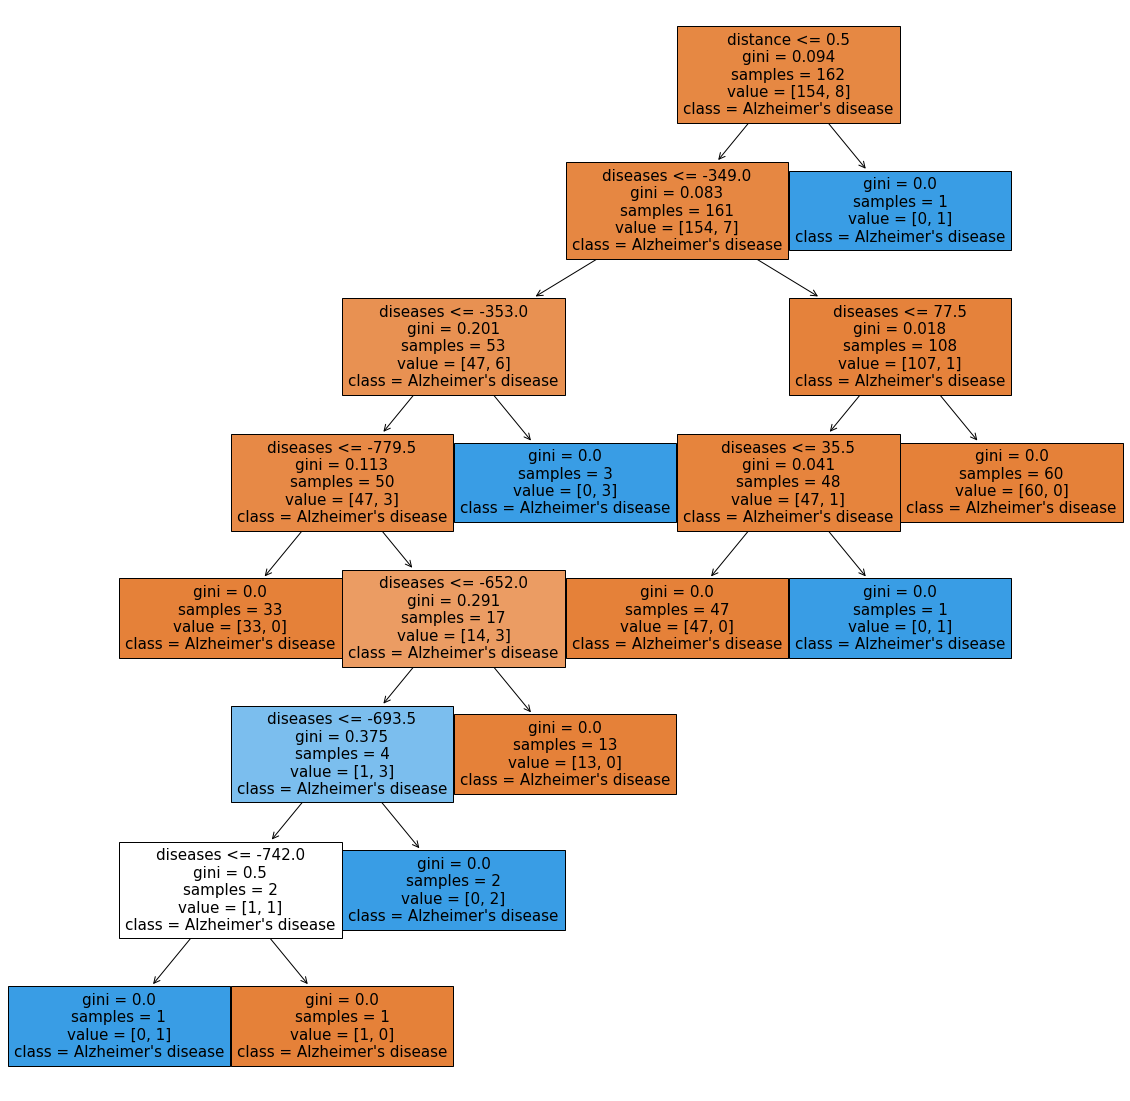

In [ ]:
zaha_tree = DecisionTreeClassifier()
zaha_tree.fit(X_train, y_train)
fi = plt.figure(figsize=(20, 20))
plo = plot_tree(zaha_tree, feature_names=list(dS.columns), class_names=dS['diseases'],filled=True)

**Accuracy of Decision Tree According To (Alzahaimer's)**

In [ ]:
zaha_DT = zaha_tree.predict(X_test)
zaha_predictionsDT = [value for value in zaha_DT]
accuracy = accuracy_score(y_test, zaha_predictionsDT)
print("Accuracy for Zahaimer Decession Tree: %.2f%%" % (accuracy * 100.0))

Accuracy for Zahaimer Decession Tree: 98.57%


**Reading DataSet (Diabates)**

In [ ]:
diabates1 = pd.read_csv('drive/MyDrive/graduation/diabates1.csv')  
diabates1.head()

,gene_name,refseq_id,miR,SNP,diseases,distance,experimentally_confirmed
0,HLA-DQB2,NR_003937,hsa-miR-641,rs1573649,Type 1 diabetes,0,NaN
1,ADM2,NM_024866,hsa-miR-658,rs761745,Type 1 diabetes,0,NaN
2,HLA-DQB2,NR_003937,hsa-miR-422a,rs1049110,Type 1 diabetes,0,NaN
3,HLA-DQB2,NR_003937,hsa-miR-378,rs1049110,Type 1 diabetes,0,NaN
4,RPH3A,NM_014954,hsa-miR-1255a,rs2240191,Type 1 diabetes,0,NaN


**Illustrate (Daiabates) Output Data**

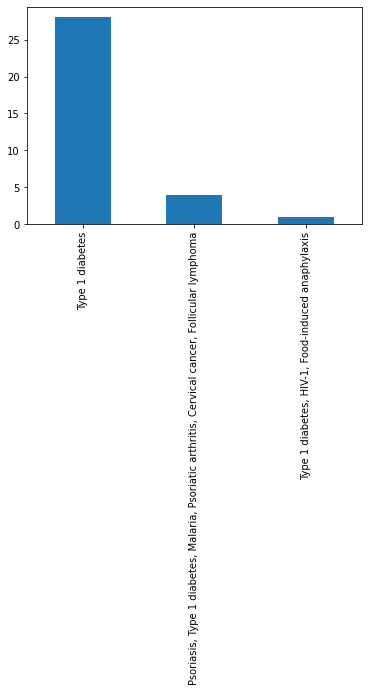

In [ ]:
diabates1['diseases'].value_counts().plot.bar()

**Pre processing Data for (diabates)**

In [ ]:
diabates1['gene_name'] = pd.get_dummies(diabates1['gene_name'])
diabates1['refseq_id'] = pd.get_dummies(diabates1['refseq_id'])
diabates1['miR'] = pd.get_dummies(diabates1['miR'])
diabates1['SNP'] = pd.get_dummies(diabates1['SNP'])
diabates1['experimentally_confirmed'] = pd.get_dummies(diabates1['experimentally_confirmed'])
diabates1.head()

,gene_name,refseq_id,miR,SNP,diseases,distance,experimentally_confirmed
0,0,0,0,0,Type 1 diabetes,0,0
1,1,0,0,0,Type 1 diabetes,0,0
2,0,0,0,1,Type 1 diabetes,0,0
3,0,0,0,1,Type 1 diabetes,0,0
4,0,0,0,0,Type 1 diabetes,0,0


**Make Data Ready for creating Algorithms of (Diabates)**

In [ ]:
diabatesX_train, diabatesX_test, diabatesy_train, diabatesy_test = train_test_split(diabates1.drop('diseases', axis=1), diabates1['diseases'], test_size= 0.3)

print('Training data With X: \n ', diabatesX_train)
print('Training data With Y: \n ', diabatesy_train)
print('\n\n\n\n\nX_TEST : ', diabatesX_test)
print('\n\n\nY_TEST : ', diabatesy_test)


Training data With X: 
      gene_name  refseq_id  miR  SNP  distance  experimentally_confirmed
28          0          0    0    0      2981                         0
9           0          0    0    0      -157                         0
5           0          0    0    0         0                         0
32          0          0    0    0      3683                         0
16          0          1    0    0      -337                         0
4           0          0    0    0         0                         0
25          0          0    0    0      2303                         0
10          0          0    0    0      -176                         0
7           0          1    0    0        92                         1
23          0          1    0    0      1537                         0
26          0          0    0    0      2871                         0
19          0          1    1    0      1101                         0
13          0          0    0    0      -209        

**Creating KNN Algorithm for (Diabates)**

In [ ]:
diabatesKNN = KNeighborsClassifier(n_neighbors=3)
diabatesKNN.fit(diabatesX_train, diabatesy_train)
diabatesKNN.predict(diabatesX_test)
#print('Predicted With Input Diabates KNN:', diabatesKNN.predict([[0 , 1, 1, 1, -209, 0]]))

array(['Type 1 diabetes', 'Type 1 diabetes', 'Type 1 diabetes',
       'Type 1 diabetes', 'Type 1 diabetes', 'Type 1 diabetes',
       'Type 1 diabetes',
       'Psoriasis, Type 1 diabetes, Malaria, Psoriatic arthritis, Cervical cancer, Follicular lymphoma',
       'Type 1 diabetes',
       'Psoriasis, Type 1 diabetes, Malaria, Psoriatic arthritis, Cervical cancer, Follicular lymphoma'],
      dtype=object)

**Accuracy of KNN According To (Diabates)**

In [ ]:
diabates_KNN = diabatesKNN.predict(diabatesX_test)
diabates_predictionsKNN = [value for value in diabates_KNN]
accuracy = accuracy_score(diabatesy_test, diabates_predictionsKNN)
print("Accuracy for Diabates KNN: %.2f%%" % (accuracy * 100.0))

Accuracy for Diabates KNN: 90.00%


**Creating XGBOOST For (Diabates)**

In [ ]:
diabatesXGBOOST = XGBClassifier()
diabatesXGBOOST.fit(diabatesX_train, diabatesy_train)
diabatesXGBOOST.predict(diabatesX_test)
#print('Predicted With Input Diabates XGOOST:', diabatesKNN.predict([[0 , 1, 1, 1, -209, 0]]))

array(['Type 1 diabetes', 'Type 1 diabetes', 'Type 1 diabetes',
       'Type 1 diabetes', 'Type 1 diabetes', 'Type 1 diabetes',
       'Type 1 diabetes', 'Type 1 diabetes', 'Type 1 diabetes',
       'Psoriasis, Type 1 diabetes, Malaria, Psoriatic arthritis, Cervical cancer, Follicular lymphoma'],
      dtype=object)

**Accuracy of XGBOOST According To (Diabates)**

In [ ]:
diabates_pred = diabatesXGBOOST.predict(diabatesX_test)
diabates_predictions = [value for value in diabates_pred]
# evaluate predictions
accuracy = accuracy_score(diabatesy_test, diabates_predictions)
print("Accuracy for Diabates XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy for Diabates XGBOOST: 100.00%


**Creating Decision Tree (Diabates)**

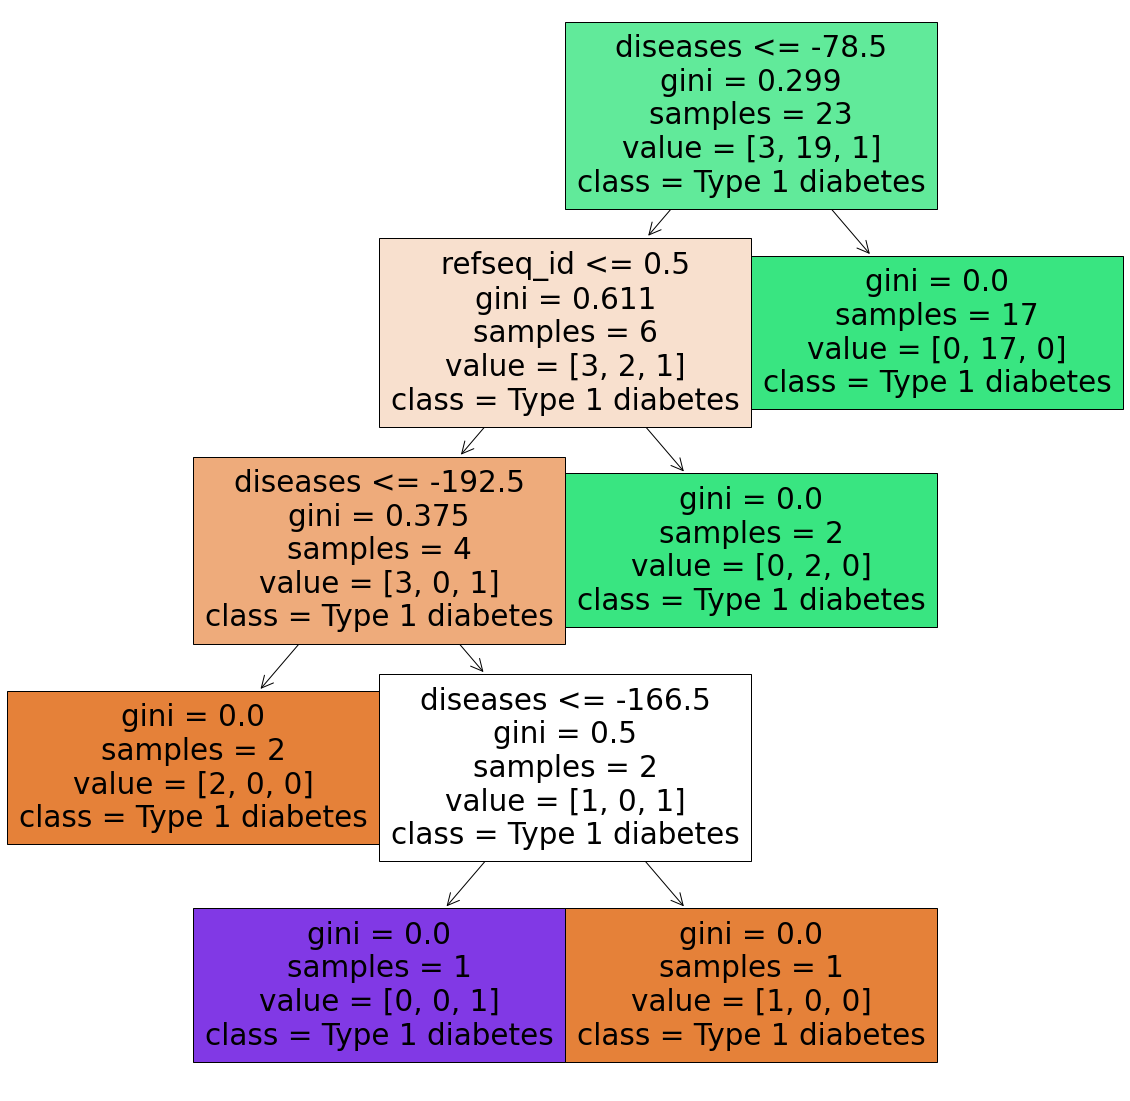

In [ ]:
diabatesTreeClassifier = DecisionTreeClassifier()
diabatesTreeClassifier.fit(diabatesX_train, diabatesy_train)
fi = plt.figure(figsize=(20, 20))
plo = plot_tree(diabatesTreeClassifier, feature_names=list(dS.columns), class_names=diabates1['diseases'],filled=True)

****Accuracy of Decision Tree According To (Diabates)****

In [ ]:
diabatesDT = diabatesTreeClassifier.predict(diabatesX_test)
diabates_predictionsDT = [value for value in diabatesDT]
# evaluate predictions
accuracy = accuracy_score(diabatesy_test, diabates_predictionsDT)
print("Accuracy for Diabates XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy for Diabates XGBOOST: 100.00%


**Reading Data For general diseases (Breast Cancer)**

In [ ]:
bC = pd.read_csv('drive/MyDrive/graduation/BreastCancer.csv')
bC.head()

,gene_name,refseq_id,miR,SNP,diseases,distance,experimentally_confirmed
0,ESR1,NM_001122740,hsa-miR-122,rs9341070,"Breast cancer, Type 2 diabetes",0,NaN
1,BMPR1B,NM_001203,hsa-miR-125b,rs1434536,Breast cancer,0,Yes
2,BMPR1B,NM_001203,hsa-miR-125a-5p,rs1434536,Breast cancer,0,NaN
3,GPX1,NM_201397,hsa-miR-1233,rs1050450,"Breast cancer, Lung cancer, Kashin-Beck disease",0,NaN
4,ZNF350,NM_021632,hsa-miR-150,rs2278414,Breast cancer,0,NaN


**Illusstrates Diseases in the dataSet (Breast Cancer)**

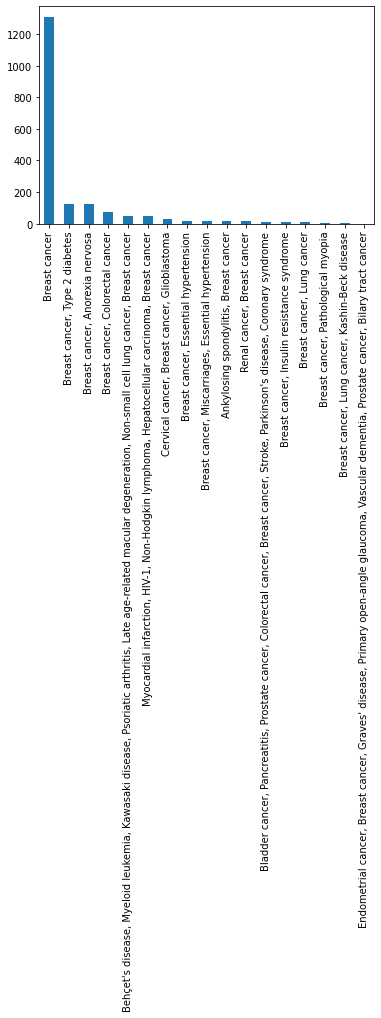

In [ ]:
bC['diseases'].value_counts().plot.bar()

**Pre processing Data (Breast Cancer)**

In [ ]:
bC['gene_name'] = pd.get_dummies(bC['gene_name'])
bC['refseq_id'] = pd.get_dummies(bC['refseq_id'])
bC['miR'] = pd.get_dummies(bC['miR'])
bC['SNP'] = pd.get_dummies(bC['SNP'])
bC['experimentally_confirmed'] = pd.get_dummies(bC['experimentally_confirmed'])
bC.head()

,gene_name,refseq_id,miR,SNP,diseases,distance,experimentally_confirmed
0,0,0,0,0,"Breast cancer, Type 2 diabetes",0,0
1,0,0,0,0,Breast cancer,0,1
2,0,0,0,0,Breast cancer,0,0
3,0,0,0,0,"Breast cancer, Lung cancer, Kashin-Beck disease",0,0
4,0,0,0,0,Breast cancer,0,0


**Making Data For Ready for Creating New Algorithms (Breast Cancer)**

In [ ]:
bCX_train, bCX_test, bCy_train, bCy_test = train_test_split(bC.drop('diseases', axis=1), bC['diseases'], test_size=0.3)
print('Training data With X: \n ', bCX_train)
print('Training data With Y: \n ', bCy_train)
print('\n\n\n\n\nX_TEST : \n', bCX_test)
print('\n\n\nY_TEST : \n', bCy_test)

Training data With X: 
        gene_name  refseq_id  miR  SNP  distance  experimentally_confirmed
255           0          0    0    0       285                         0
1450          0          0    1    0     -2186                         0
1593          0          0    0    0     -2738                         0
1721          0          0    0    0     -3538                         0
1360          0          0    0    0     -1944                         0
...         ...        ...  ...  ...       ...                       ...
1218          0          0    0    0     -1600                         0
549           0          0    0    0      -597                         0
1153          0          0    0    0     -1527                         1
556           0          0    0    0      -625                         0
1624          0          0    0    0     -2953                         0

[1304 rows x 6 columns]
Training data With Y: 
  255                       Breast cancer
1450     

**KNN Algorithm (Breast Cancer)**

In [ ]:
bCKNN = KNeighborsClassifier(n_neighbors=3)
bCKNN.fit(bCX_train, bCy_train)
bCKNN.predict(bCX_test)

array(['Breast cancer', 'Breast cancer', 'Breast cancer', 'Breast cancer',
       'Breast cancer, Type 2 diabetes',
       'Breast cancer, Anorexia nervosa',
       'Breast cancer, Type 2 diabetes', 'Breast cancer',
       'Breast cancer, Type 2 diabetes', 'Breast cancer', 'Breast cancer',
       "Behçet's disease, Myeloid leukemia, Kawasaki disease, Psoriatic arthritis, Late age-related macular degeneration, Non-small cell lung cancer, Breast cancer",
       'Breast cancer, Miscarriages, Essential hypertension',
       'Breast cancer', 'Breast cancer', 'Breast cancer', 'Breast cancer',
       'Breast cancer', 'Breast cancer', 'Breast cancer, Lung cancer',
       'Breast cancer', 'Breast cancer, Anorexia nervosa',
       'Breast cancer', 'Breast cancer',
       'Breast cancer, Anorexia nervosa', 'Breast cancer',
       'Ankylosing spondylitis, Breast cancer', 'Breast cancer',
       'Breast cancer', 'Breast cancer', 'Breast cancer',
       'Breast cancer, Anorexia nervosa', 'Breast can

**Accuracy of KNN (Breast Cancer)**

In [ ]:
bC_KNN = bCKNN.predict(bCX_test)
bC_predictionsKNN = [value for value in bC_KNN]
accuracy = accuracy_score(bCy_test, bC_predictionsKNN)
print("Accuracy for Breast Cancer KNN: %.2f%%" % (accuracy * 100.0))

Accuracy for Diabates KNN: 86.79%


**XGBOOST Algorithm (Breast Cancer)**

In [ ]:
bCXGBOOST = XGBClassifier()
bCXGBOOST.fit(bCX_train, bCy_train)
bCXGBOOST.predict(bCX_test)

array(['Breast cancer', 'Breast cancer', 'Breast cancer', 'Breast cancer',
       'Breast cancer', 'Breast cancer', 'Breast cancer, Type 2 diabetes',
       'Breast cancer', 'Breast cancer, Type 2 diabetes', 'Breast cancer',
       'Breast cancer',
       "Behçet's disease, Myeloid leukemia, Kawasaki disease, Psoriatic arthritis, Late age-related macular degeneration, Non-small cell lung cancer, Breast cancer",
       'Breast cancer, Miscarriages, Essential hypertension',
       'Breast cancer', 'Breast cancer', 'Breast cancer', 'Breast cancer',
       'Breast cancer', 'Breast cancer', 'Breast cancer', 'Breast cancer',
       'Breast cancer', 'Breast cancer', 'Breast cancer',
       'Breast cancer, Anorexia nervosa', 'Breast cancer',
       'Ankylosing spondylitis, Breast cancer', 'Breast cancer',
       'Breast cancer', 'Breast cancer', 'Breast cancer', 'Breast cancer',
       'Breast cancer', 'Breast cancer', 'Breast cancer',
       'Myocardial infarction, HIV-1, Non-Hodgkin lymphoma

**Accuracy of XGBOOST (Breast Cancer)**

In [ ]:
bC_XGBOOST = bCXGBOOST.predict(bCX_test)
bC_predictionsXGBOOST = [value for value in bC_XGBOOST]
accuracy = accuracy_score(bCy_test, bC_predictionsXGBOOST)
print("Accuracy for Breast Cancer XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy for Diabates XGBOOST: 88.39%


**Decision Tree Algorihm (Breast Cancer)**

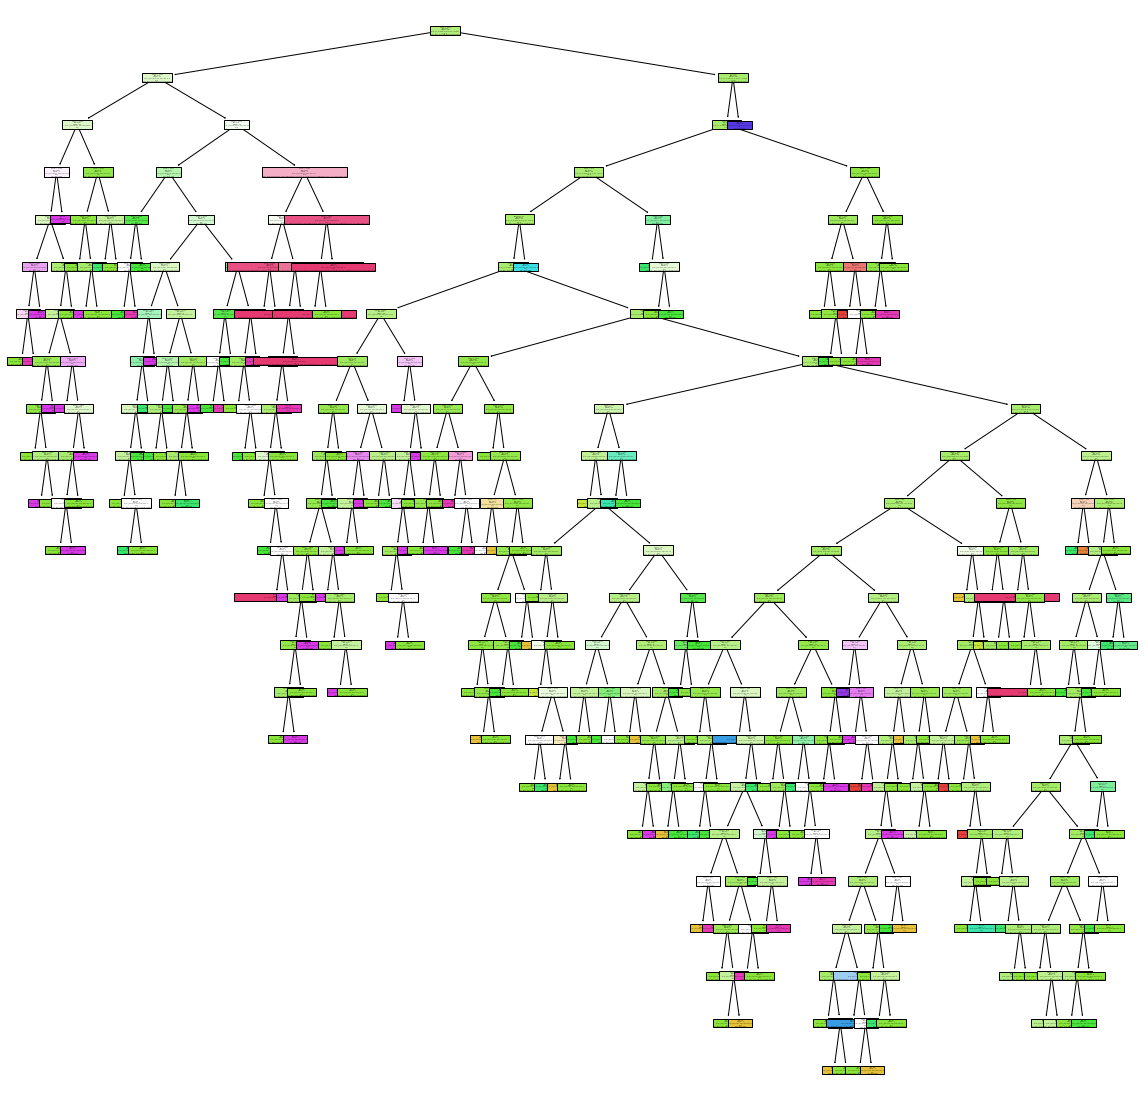

In [ ]:
bCDT = DecisionTreeClassifier()
bCDT.fit(bCX_train, bCy_train)
bCDT.predict(bCX_test)
fi = plt.figure(figsize=(20, 20))
plo = plot_tree(bCDT, feature_names=list(bC.columns), class_names=bC['diseases'],filled=True)

**Accuracy of DT (Breast Cancer)**

In [ ]:
bC_DT = bCDT.predict(bCX_test)
bC_predictionsDT = [value for value in bC_DT]
accuracy = accuracy_score(bCy_test, bC_predictionsDT)
print("Accuracy for Breast Cancer XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy for Diabates XGBOOST: 91.25%
